# Supply Chain Analytics in Tableau or Power BI

## 📖 Background
Test your BI skills on a real-world dataset focusing on supply chain analytics. As the main data analyst for Just In Time, you will help solve key shipment and inventory management challenges, analyze supply chain inefficiencies, and create insightful dashboards to inform business stakeholders about potential problems and propose structural business improvements.

Be creative and make use of your full skillset! Use this Workspace to prepare your data, import the tables into your local Tableau or Power BI instance, and share your insights below.

The end goal will be a (set of) interactive dashboards that demonstrate clear insights for Just In Time.

## 💾 The data


| Group | Column name | Dataset | Definition |
|:---|:---|:---|:---|
| Customer | Customer ID | orders_and_shipments.csv | Unique customer identification |
| Customer | Customer Market | orders_and_shipments.csv | Geographic grouping of customer countries, with values such as Europe, LATAM, Pacific Asia, etc. |
| Customer | Customer Region | orders_and_shipments.csv | Geographic grouping of customer countries, with values such as Northern Europe, Western Europe, etc. |
| Customer | Customer Country | orders_and_shipments.csv | Customer's country |
| Order info | Order ID | orders_and_shipments.csv | Unique Order identification. Order groups one or multiple Order Items |
| Order info | Order Item ID | orders_and_shipments.csv | Unique Order Item identification. Order Item always belong to just one Order |
| Order info | Order Year | orders_and_shipments.csv | Year of the order |
| Order information | Order Month | orders_and_shipments.csv | Month of the order |
| Order information | Order Day | orders_and_shipments.csv | Day of the order |
| Order information | Order Time | orders_and_shipments.csv | Timestamp of the order in UTC |
| Order information | Order Quantity | orders_and_shipments.csv | The amount of items that were ordered within a given Order Item (1 record of the data) |
| Product | Product Department | orders_and_shipments.csv | Product grouping into categories such as Fitness, Golf, Pet Shop, etc. |
| Product | Product Category | orders_and_shipments.csv | Product grouping into categories such as Sporting Goods, Women's Apparel, etc. |
| Product | Product Name | orders_and_shipments.csv | The name of the purchased product |
| Sales | Gross Sales | orders_and_shipments.csv | Revenue before discounts generated by the sales of the Order Item (1 record of the data) |
| Sales | Discount % | orders_and_shipments.csv | Discount % applied on the catalog price |
| Sales | Profit | orders_and_shipments.csv | Profit generated by the sales of the Order Item (1 record of data) |
| Shipment information | Shipment Year | orders_and_shipments.csv | Year of the shipment |
| Shipment information | Shipment Month | orders_and_shipments.csv | Month of the shipment |
| Shipment information | Shipment Day | orders_and_shipments.csv | Day of the shipment |
| Shipment information | Shipment Mode | orders_and_shipments.csv | Information on how the shipment has been dispatched, with values as First Class, Same Day, Second Class, etc. |
| Shipment information | Shipment Days - Scheduled | orders_and_shipments.csv | Information on typical amount of days needed to dispatch the goods from the moment the order has been placed |
| Warehouse | Warehouse Country | orders_and_shipments.csv | Country of the warehouse that has fulfilled this order, the only two values being Puerto Rico and USA |
| Inventory & Fulfillment | Warehouse Inventory | inventory.csv | The monthly level of inventory of a product, e.g. 930 units |
| Inventory & Fulfillment | Inventory cost per unit | inventory.csv | The monthly storage cost per unit of inventory, e.g. $2.07 |
| Inventory & Fulfillment | Warehouse Order fulfillment (days) | fulfillment.csv | The average amount of days it takes to refill stock if inventory drops below zero |


**The data can be downloaded from the sidebar on the left (under _Files_).**

## 💪 Challenge
Using either Tableau or Power BI, create an interactive dashboard to summarize your research. Things to consider:

1. Use this Workspace to prepare your data (optional).
2. Some ideas to get you started: visualize how shipments are delayed, by country, product, and over time. Analyze products by their supply versus demand ratio. Rank products by over or understock. Don't feel limited by these, you're encouraged to use your skills to consolidate as much information as possible. 
3. Create a screenshot of your (main) Tableau or Power BI dashboard, and paste that into the designated field.
4. Summarize your findings in an executive summary.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
# Examine first few rows of orders_and_shipments
df_main=pd.read_csv("data/orders_and_shipments.csv")
df_main.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,LATAM,Central America,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,LATAM,South America,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,LATAM,Central America,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


In [3]:
# Examine shape of df_main
df_main.shape

(30871, 24)

In [4]:
# Generate summary statistics for orders dataset
df_main.describe(include='all')

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
count,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871,30871.000000,30871,30871,30871,30871.000000,30871,30871,30871,30871,30871.000000,30871.000000,30871.000000,30871,30871.000000,30871.000000,30871,30871.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1440,NaN,11,49,113,NaN,5,23,139,2,NaN,NaN,NaN,4,NaN,NaN,18,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,08:27,NaN,Fan Shop,Cleats,Perfect Fitness Perfect Rip Deck,NaN,LATAM,Central America,USA,USA,NaN,NaN,NaN,Standard Class,NaN,NaN,0.02,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,42,NaN,11550,4298,4292,NaN,9118,5125,4392,18997,NaN,NaN,NaN,17994,NaN,NaN,1772,NaN
mean,35818.833792,89380.257361,201601.137411,2015.948657,6.271679,15.735026,NaN,2.149817,NaN,NaN,NaN,6477.672152,NaN,NaN,NaN,NaN,2015.955427,6.299569,15.978005,NaN,3.072495,200.235690,NaN,129.383305
std,20623.809444,51279.388574,79.438616,0.796323,3.373914,8.484049,NaN,1.461393,NaN,NaN,NaN,3932.830830,NaN,NaN,NaN,NaN,0.798863,3.360191,8.582789,NaN,1.184417,114.251482,NaN,52.649857
min,11.000000,29.000000,201501.000000,2015.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2015.000000,1.000000,1.000000,NaN,1.000000,10.000000,NaN,6.000000
25%,17905.000000,44721.500000,201509.000000,2015.000000,3.000000,9.000000,NaN,1.000000,NaN,NaN,NaN,3177.000000,NaN,NaN,NaN,NaN,2015.000000,3.000000,9.000000,NaN,2.000000,120.000000,NaN,97.000000
50%,35886.000000,89624.000000,201606.000000,2016.000000,6.000000,16.000000,NaN,1.000000,NaN,NaN,NaN,6355.000000,NaN,NaN,NaN,NaN,2016.000000,6.000000,16.000000,NaN,4.000000,200.000000,NaN,125.000000
75%,53507.000000,133710.500000,201702.000000,2017.000000,9.000000,23.000000,NaN,3.000000,NaN,NaN,NaN,9577.000000,NaN,NaN,NaN,NaN,2017.000000,9.000000,23.000000,NaN,4.000000,300.000000,NaN,150.000000


In [5]:
# Check for missing values (remove head method to see all results), though no vals are missing
df_main.isnull().sum().head()

Order ID             0
 Order Item ID       0
 Order YearMonth     0
 Order Year          0
 Order Month         0
dtype: int64

In [6]:
# Some columns have a leading/trailing spaces in their names, let's remove those
df_main=df_main.rename(columns=lambda x: x.strip())
df_main.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')

In [7]:
# Replace dashes in discount percent column with 0s

# First, strip spaces from Discount % column
df_main['Discount %']=df_main['Discount %'].str.strip()

# Make replacements
df_main['Discount %']=np.where(df_main['Discount %']=="-", 0, df_main['Discount %'])

# Change dtype of Discount %
df_main=df_main.astype({'Discount %':'float'})

In [8]:
# For dashboard build, having a datetime value in df_main will be useful
# Concat order year, month, day, and time into a format that pd.to_datetime will accept
df_main['Order DT']=df_main['Order Year'].astype(str)+'-'+df_main['Order Month'].astype(str)+'-'+df_main['Order Day'].astype(str)+' '+df_main['Order Time'].astype(str)

# Convert new col to DT
df_main['Order DT']=pd.to_datetime(df_main['Order DT'])
df_main.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order DT
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,LATAM,Central America,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200,2015-02-21 14:07:00
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,LATAM,South America,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200,2015-03-02 07:37:00
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,LATAM,Central America,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200,2015-04-18 22:47:00
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200,2015-06-10 22:32:00
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200,2015-06-10 22:32:00


In [9]:
# Examine distribution of quantitative cols in main
# Discount % appears as an object dtype, so have to convert to float
df_num=df_main[['Order Quantity', 'Gross Sales', 'Discount %', 'Profit']]
df_num.dtypes

Order Quantity      int64
Gross Sales         int64
Discount %        float64
Profit              int64
dtype: object

array([[<AxesSubplot: title={'center': 'Order Quantity'}>,
        <AxesSubplot: title={'center': 'Gross Sales'}>],
       [<AxesSubplot: title={'center': 'Discount %'}>,
        <AxesSubplot: title={'center': 'Profit'}>]], dtype=object)

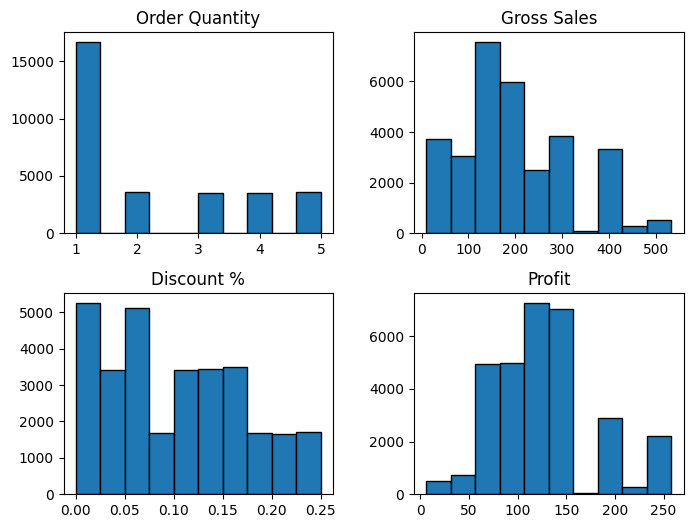

In [10]:
# Histograms for quantiative cols
fig, axis = plt.subplots(2, 2, figsize=(8, 6))
df_num.hist(ax=axis, edgecolor='black', grid=False)

In [11]:
# Avg order quantity, gross sales, profit, and discount % can also be calculated on a per order basis
print("Average number of units per order is", round(df_main.groupby(['Order ID'])['Order Quantity'].sum().mean(), 2))
print("Average gross sales per order is", round(df_main.groupby(['Order ID'])['Gross Sales'].sum().mean(), 2))
print("Average profit per order is", round(df_main.groupby(['Order ID'])['Profit'].sum().mean(), 2))

# Average discount % per order must be calculated slightly differently
# Create new col for price paid
df_main['Price Paid']=(1-df_main['Discount %'])*df_main['Gross Sales']
total_price_paid=df_main.groupby(['Order ID'])['Price Paid'].sum().sum()
total_gross_sales=df_main.groupby(['Order ID'])['Gross Sales'].sum().sum()
avg_discount_dec=1-(total_price_paid/total_gross_sales)
print("Average discount percentage (in decimal format) is", round(avg_discount_dec, 3))

Average number of units per order is 5.99
Average gross sales per order is 558.3
Average profit per order is 360.75
Average discount percentage (in decimal format) is 0.101


In [12]:
# Finally, let's examine frequencies for key qualitative columns
df_qual=df_main[['Product Department', 'Product Category', 'Customer Market', 'Customer Region', 'Warehouse Country', 'Shipment Mode']]

# Before creating plots, let's make some replacements in the product category column
# There's a big drop off after the top 9 categories, so let's replacement everything after that with "Other"
top_9=["Cleats", "Men's Footwear", "Women's Apparel", "Indoor/Outdoor Games", "Fishing", "Water Sports", "Camping & Hiking", "Cardio Equipment", "Shop By Sport"]
df_qual["Product Category"]=df_qual["Product Category"].apply(lambda x: x if x in top_9 else "Other")
df_qual["Product Category"].value_counts()

Cleats                  4298
Men's Footwear          3855
Women's Apparel         3622
Other                   3573
Indoor/Outdoor Games    3416
Fishing                 2878
Water Sports            2688
Camping & Hiking        2427
Cardio Equipment        2190
Shop By Sport           1924
Name: Product Category, dtype: int64

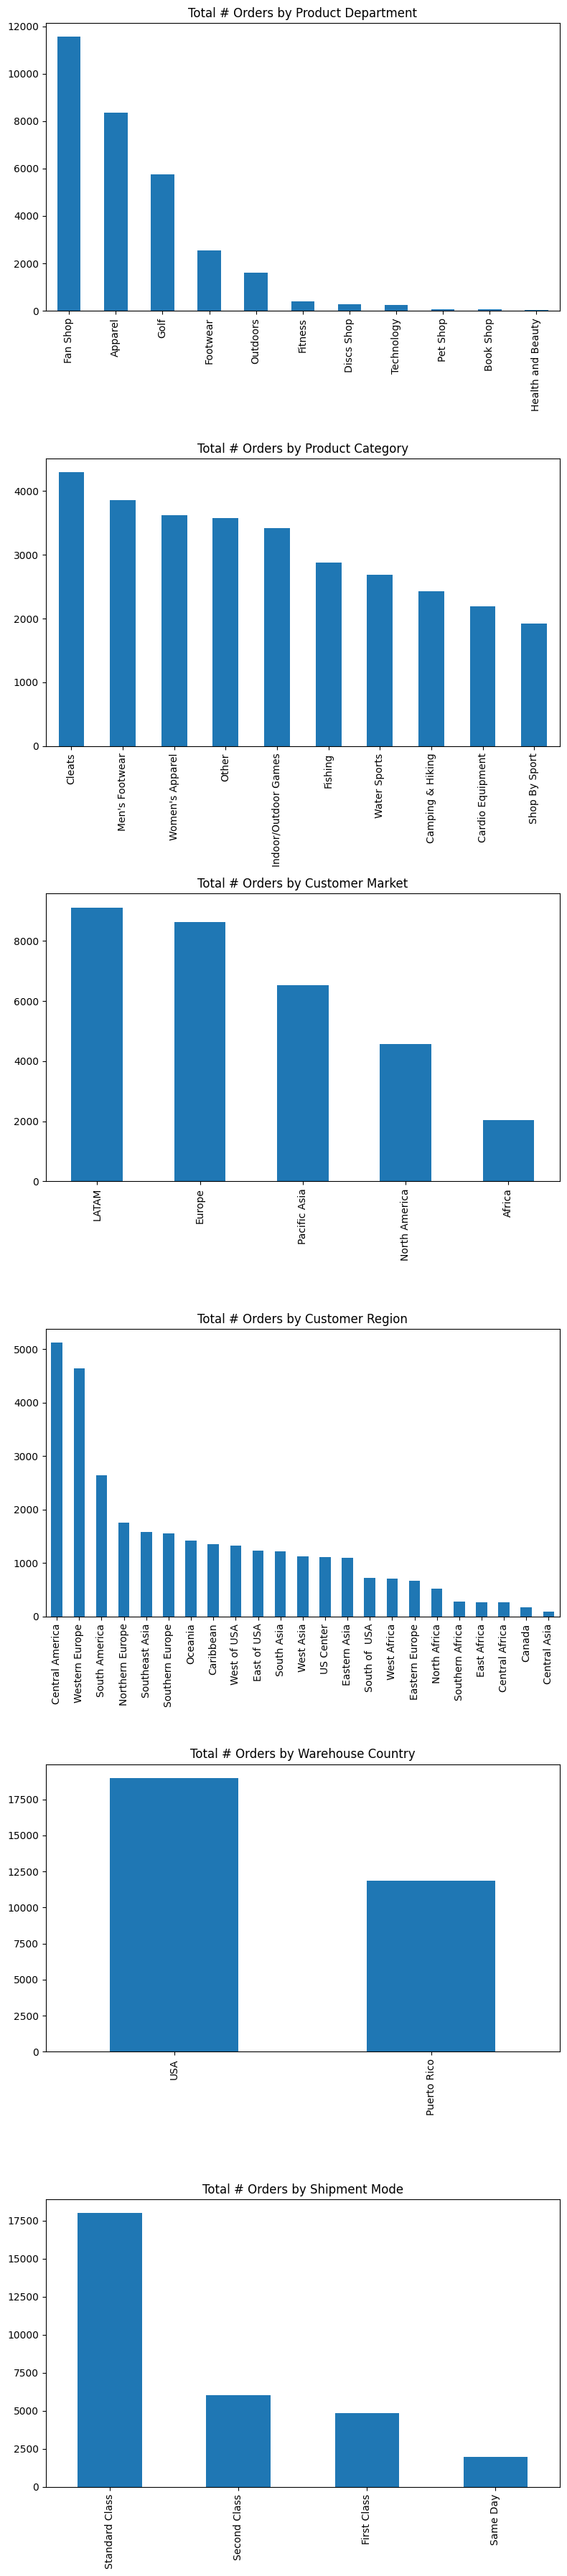

In [13]:
# Create subplots
fig, axs = plt.subplots(len(df_qual.columns), 1, figsize=(8, 6 * len(df_qual.columns)))

# Iterate over columns
for i, col in enumerate(df_qual.columns):
    # Plot value counts as bar plot
    df_qual[col].value_counts().plot.bar(ax=axs[i], title='Total # Orders by ' + col)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [14]:
# Inspect inventory, fulfillment files
df_inv=pd.read_csv("data/inventory.csv")
df_inv.head()

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [15]:
# Examine shape, columns of df_inv
print(df_inv.shape, df_inv.columns)

(4200, 4) Index(['Product Name', ' Year Month ', ' Warehouse Inventory ',
       'Inventory Cost Per Unit'],
      dtype='object')


In [16]:
# Rename columns to remove whitespace
df_inv=df_inv.rename(columns=lambda x: x.strip())

In [17]:
# Let's examine average inventory by month by product department

# Drop duplicates in df_main
df_temp=df_main.drop_duplicates(subset=['Product Name'], keep='first')

# Join df_inv onto df_main
df_inv=df_inv.merge(df_temp[['Product Department', 'Product Name']], on='Product Name', how='left')
df_inv=df_inv[['Product Department', 'Product Name', 'Year Month', 'Warehouse Inventory', 'Inventory Cost Per Unit']]

# Change Year Month to datetime
df_inv['Year Month']=pd.to_datetime(df_inv['Year Month'], format='%Y%m')
df_inv

,Product Department,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Apparel,Perfect Fitness Perfect Rip Deck,2017-12-01,0,0.69517
1,Golf,Nike Men's Dri-FIT Victory Golf Polo,2017-12-01,2,1.29291
2,Fan Shop,O'Brien Men's Neoprene Life Vest,2017-12-01,0,0.56531
3,Footwear,Nike Men's Free 5.0+ Running Shoe,2017-12-01,1,1.26321
4,Golf,Under Armour Girls' Toddler Spine Surge Runni,2017-12-01,0,1.47648
...,...,...,...,...,...
4195,Outdoors,TaylorMade 2017 Purelite Stand Bag,2015-01-01,0,1.44662
4196,Outdoors,Ogio Race Golf Shoes,2015-01-01,0,0.10310
4197,Outdoors,GolfBuddy VT3 GPS Watch,2015-01-01,0,1.77747
4198,Outdoors,Titleist Small Wheeled Travel Cover,2015-01-01,0,0.15244


In [18]:
# Use groupby to get sum of inventory units by department, year month
df_ts=df_inv.groupby(['Product Department', 'Year Month'])['Warehouse Inventory'].sum().reset_index()
df_ts.head()

,Product Department,Year Month,Warehouse Inventory
0,Apparel,2015-01-01,260
1,Apparel,2015-02-01,783
2,Apparel,2015-03-01,711
3,Apparel,2015-04-01,731
4,Apparel,2015-05-01,785


In [19]:
# Create list of distinct Prod Dep values
prod_list=df_ts['Product Department'].unique()

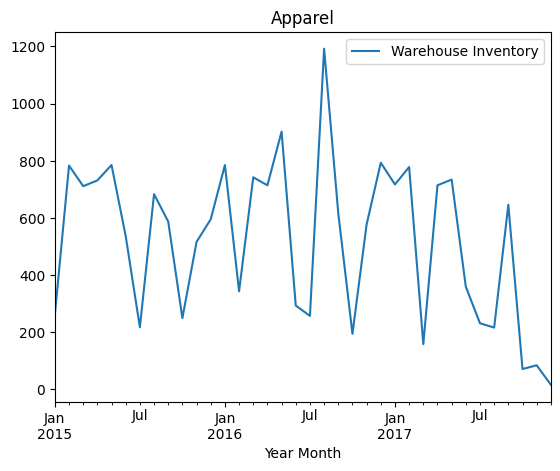

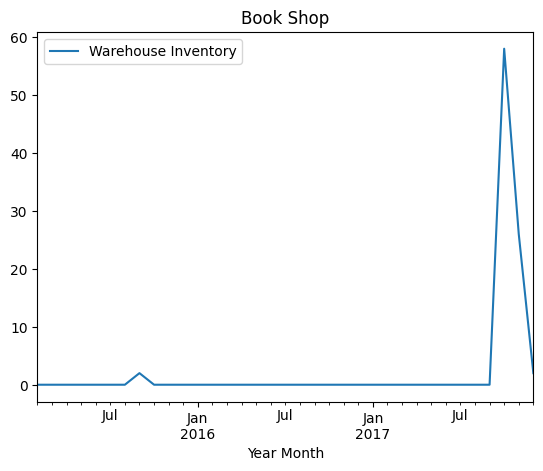

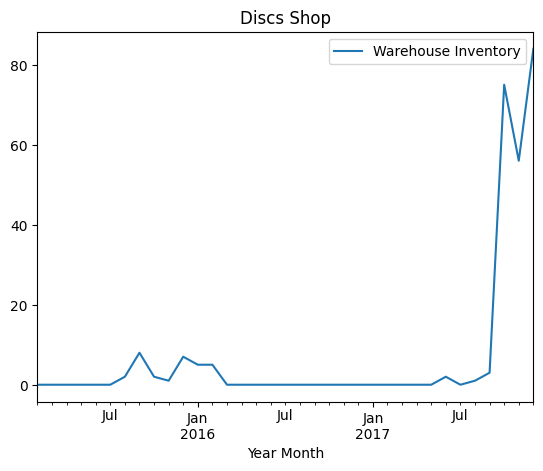

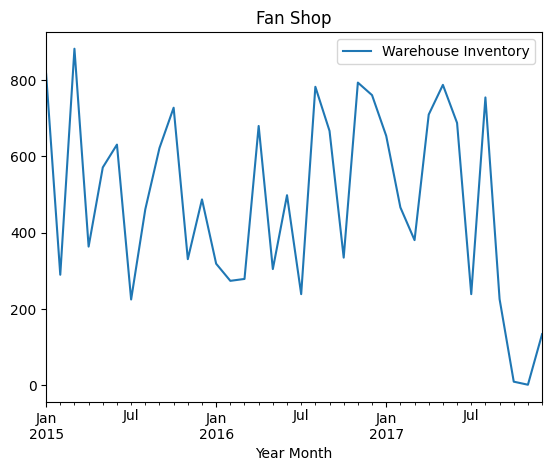

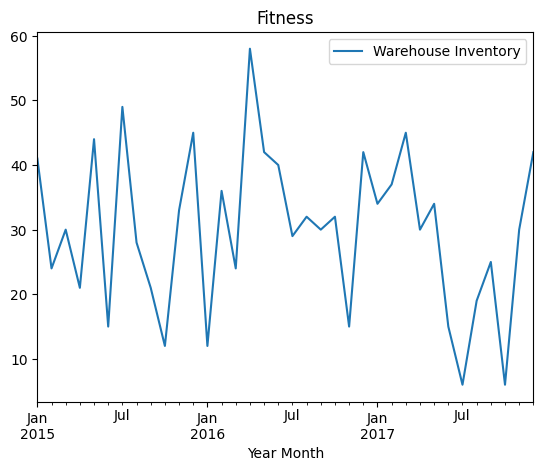

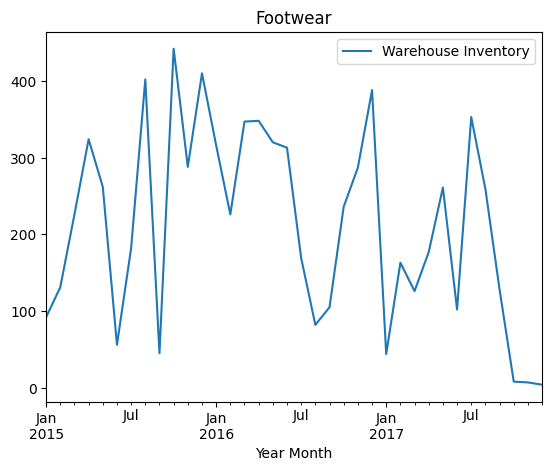

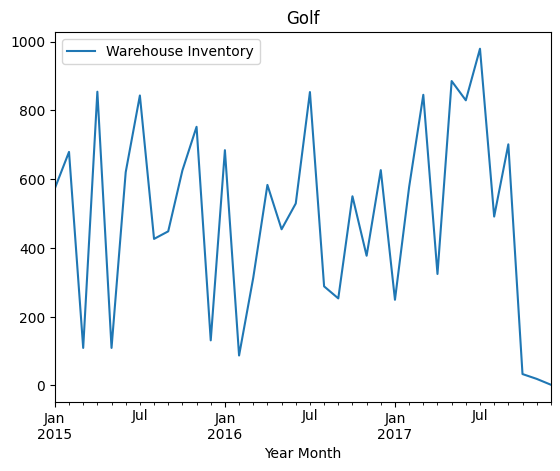

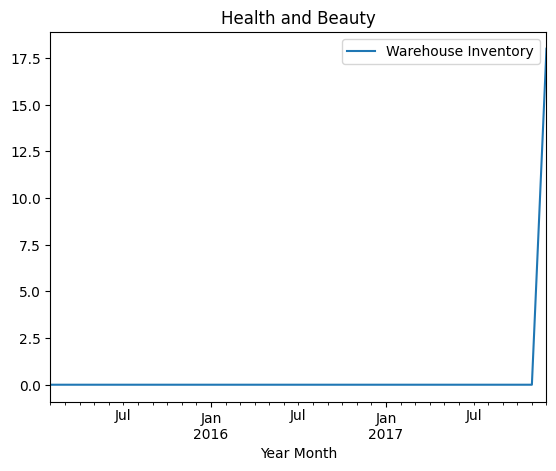

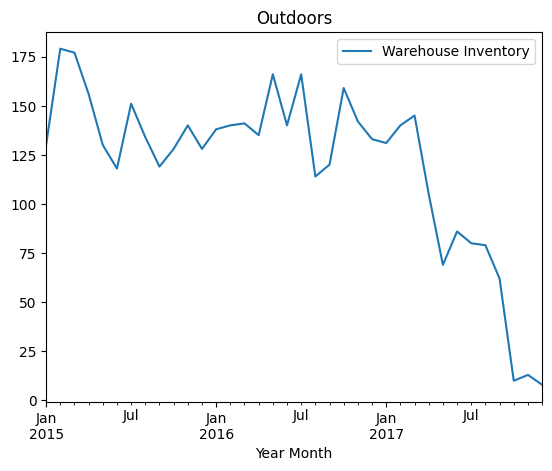

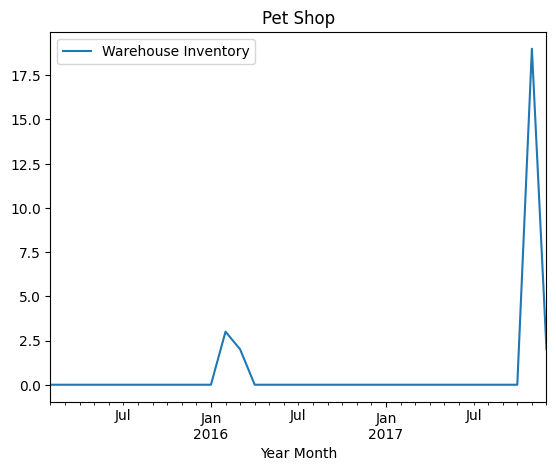

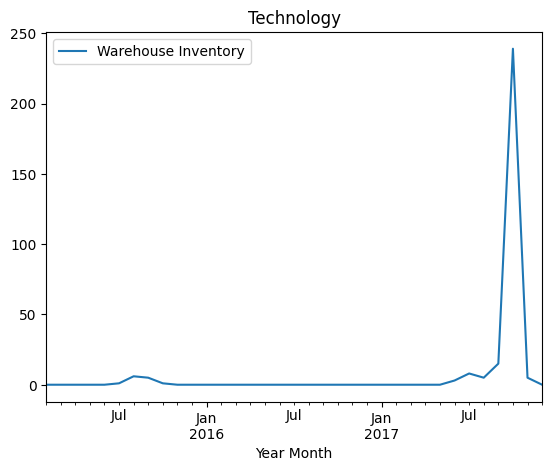

In [20]:
# Subplots test
for i in range(0, len(prod_list)):
    df_ts[df_ts['Product Department']==prod_list[i]].plot(x='Year Month', y='Warehouse Inventory', title=prod_list[i])  
plt.show()

In [21]:
# Inspect first few rows of fulfillment
df_ful=pd.read_csv("data/fulfillment.csv")
df_ful.head()

,Product Name,Warehouse Order Fulfillment (days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


In [22]:
# Examine shape of df_ful
df_ful.shape

(118, 2)

In [23]:
# Join fulfillment df onto df_main
df_ful=df_ful.merge(df_main[['Product Department', 'Product Category', 'Product Name']], on='Product Name', how='left')
df_ful=df_ful.drop_duplicates(keep='first')

# Some columns have a leading/trailing spaces in their names, let's remove those
df_ful=df_ful.rename(columns=lambda x: x.strip())
df_ful=df_ful[['Product Department', 'Product Category', 'Product Name', 'Warehouse Order Fulfillment (days)']]
df_ful.head()

,Product Department,Product Category,Product Name,Warehouse Order Fulfillment (days)
0,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,8.3
4292,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,6.6
7914,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,5.5
11330,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,9.4
13456,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,6.3


In [24]:
# Let's compare avg fulfillment time by product department
dep_series=df_ful.groupby(['Product Department'])['Warehouse Order Fulfillment (days)'].mean()
dep_df=dep_series.reset_index()
dep_df=dep_df.rename(columns={0:'Product Department', 1:'Avg Fulfillment Time'})
dep_df['Warehouse Order Fulfillment (days)']=round(dep_df['Warehouse Order Fulfillment (days)'], 2)
dep_df.head()

,Product Department,Warehouse Order Fulfillment (days)
0,Apparel,5.96
1,Book Shop,5.20
2,Discs Shop,7.05
3,Fan Shop,3.96
4,Fitness,5.95


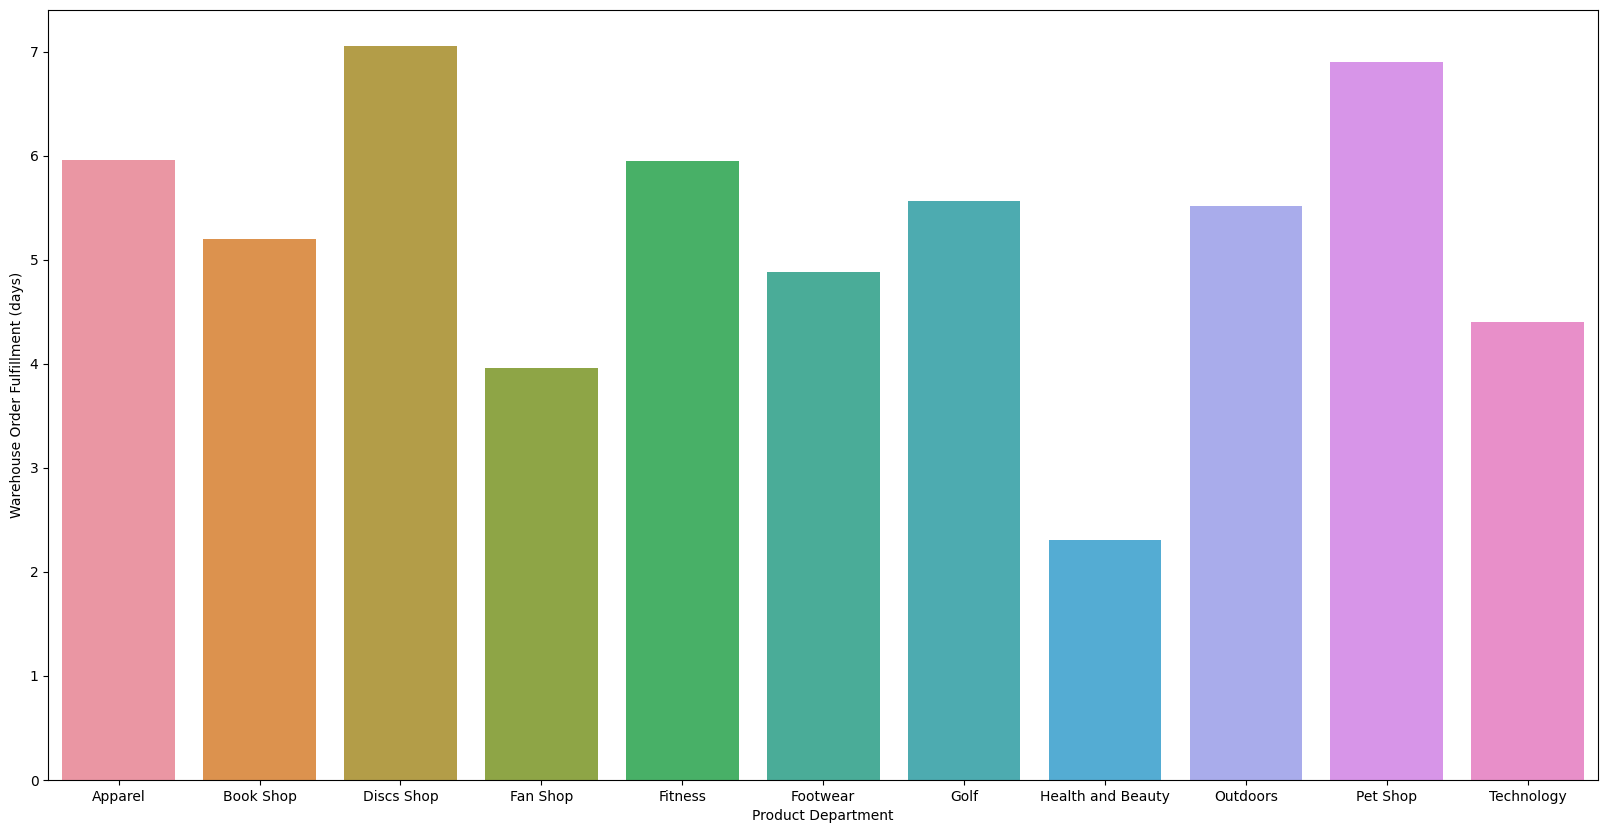

In [25]:
# Plot fulfillment times in bar chart
plt.figure(figsize=(20, 10))
plt.xticks(fontsize=10)
sns.barplot(data=dep_df, x="Product Department", y="Warehouse Order Fulfillment (days)")
plt.show()

In [26]:
# Can also compare fulfillment more granularly by considering prod category
dep_series2=df_ful.groupby(['Product Department', 'Product Category'])['Warehouse Order Fulfillment (days)'].mean()
dep_df2=dep_series2.reset_index()
dep_df2=dep_df2.rename(columns={0:'Product Department', 1:'Product Category', 2:'Avg Fulfillment Time'})
dep_df2['Warehouse Order Fulfillment (days)']=round(dep_df2['Warehouse Order Fulfillment (days)'], 2)
dep_df2.head()

,Product Department,Product Category,Warehouse Order Fulfillment (days)
0,Apparel,Baby,7.9
1,Apparel,Children's Clothing,2.7
2,Apparel,Cleats,4.8
3,Apparel,Crafts,7.1
4,Apparel,Men's Clothing,6.5


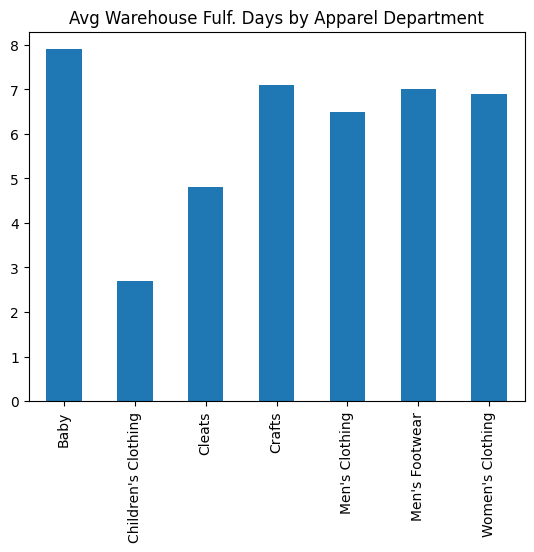

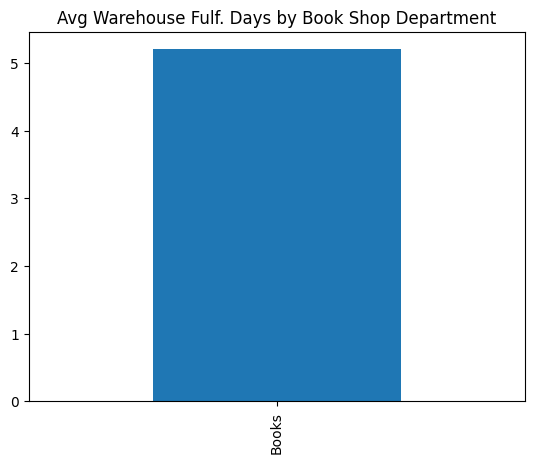

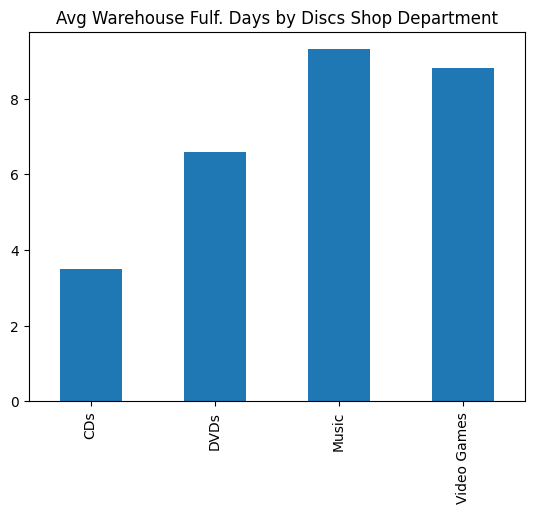

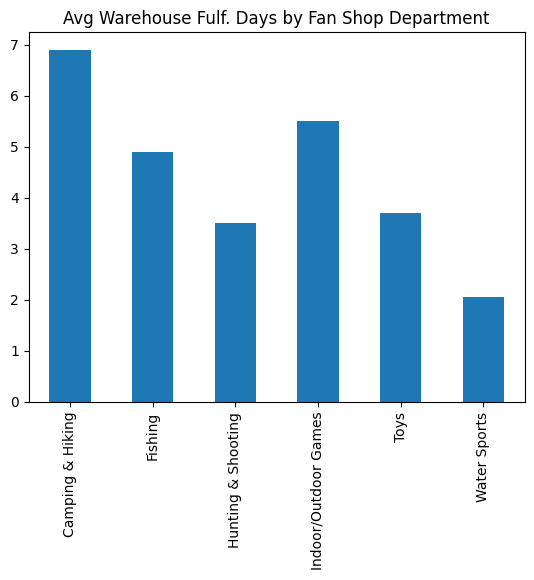

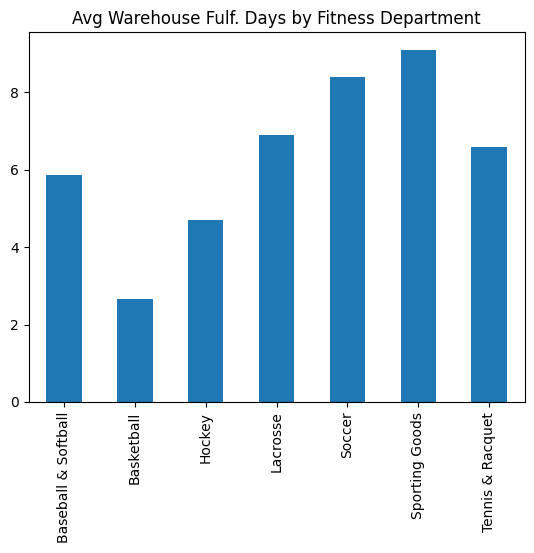

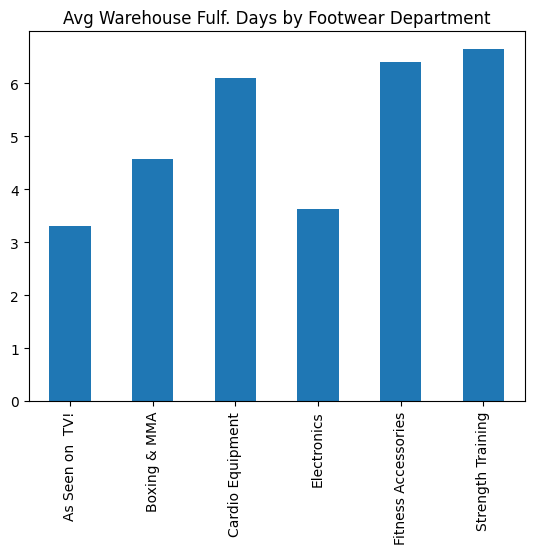

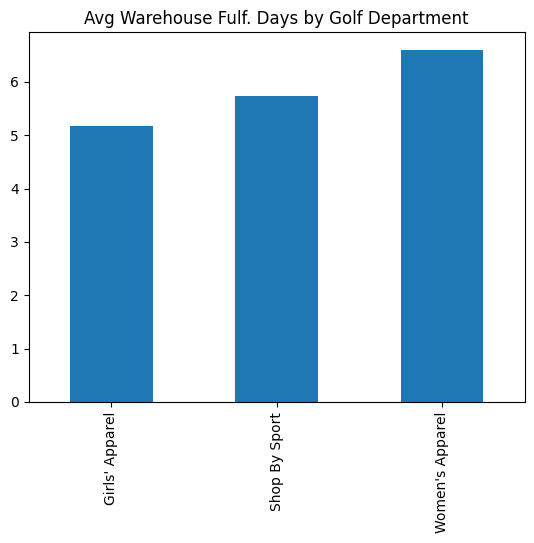

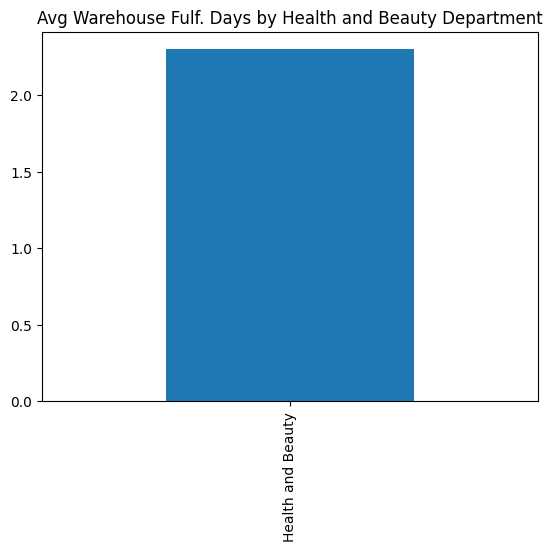

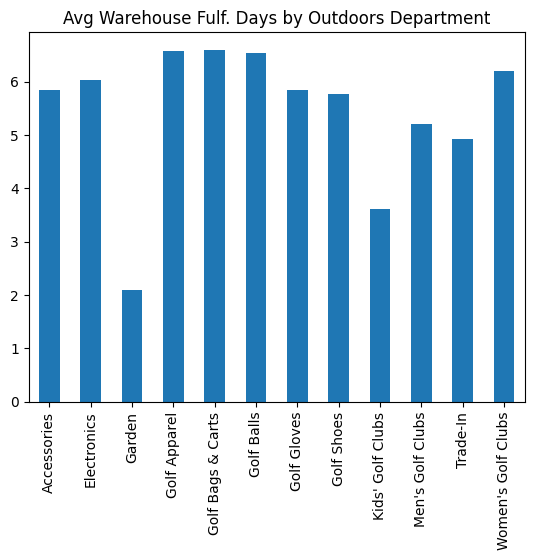

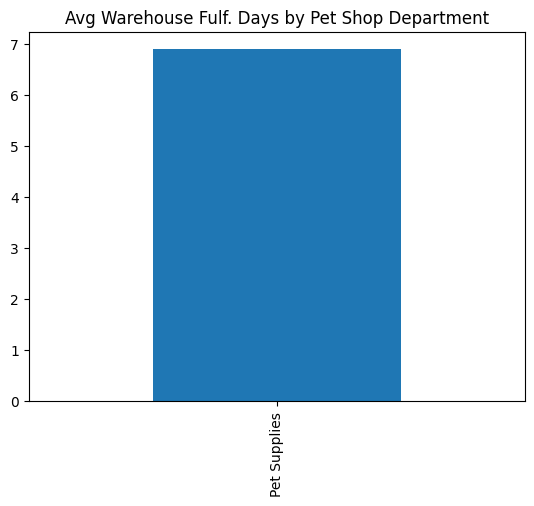

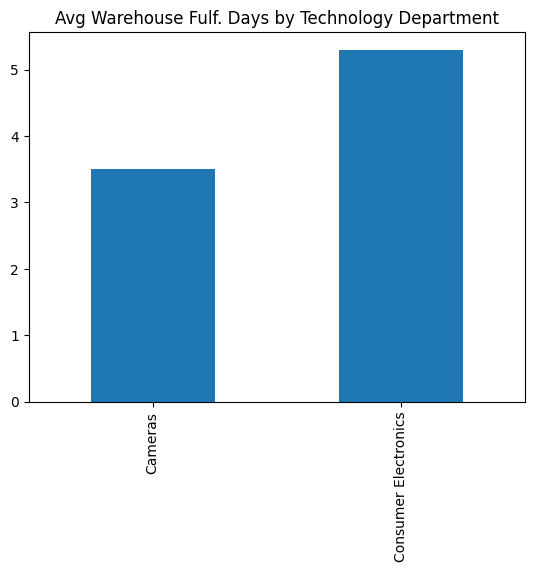

In [27]:
# TODO: Add main titles, remove x-axis titles

# Create unique list of product category elements
prod_list2=dep_df2['Product Department'].unique()

# Use for loop to iterate over different product categories
for i in range(0, len(prod_list2)):
    dep_df2[dep_df2['Product Department']==prod_list2[i]].plot.bar(x='Product Category', y="Warehouse Order Fulfillment (days)", title="Avg Warehouse Fulf. Days by "+prod_list2[i] + " Department", legend=False, xlabel='')  

# Show plots
plt.show()

In [28]:
# Don't forget, the bulk of the work is dashboarding, but you could possibly leverage some of these new df's you've created by exporting them to Power BI
# Geospatial maps might be a good fit for the dashboard

## ✅ Checklist before publishing
- If you use Tableau, don't forget to publish your Tableau dashboard, make it available on Tableau Public and share the link.
- If you use Power BI, upload your `.pbix` file to this Workspace through the sidebar on the left (under _Files_).
- **Remove redundant text cells** like the background, data, challenge, and checklist. You can add cells if necessary.

## ✍️ Judging criteria
| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Visualizations** | 35% | <ul><li>Appropriateness of visualizations used.</li><li>Clarity of insight from visualizations.</li></ul> |
| **Insights** | 25%       | <ul><li>Clarity of insights - how clear and well presented the insights are.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 25%       | <ul><li>How well the data and insights are connected to tell a story.</li><li>How the narrative and whole report connects together.</li><li>How balanced the report is: in-depth enough but also concise.</li></ul> |
| **Votes** | 15% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## 🧾 Executive summary
_In a couple of lines, write your main findings here._

## 📷 Dashboard screenshot
_Paste one screenshot of your Tableau or Power BI dashboard here._

## 🌐 Upload your dashboard
For Tableau: paste the link to your Tableau Public dashboard here.

For Power BI: upload your `.pbix` file to _Files_ in the sidebar on the left.



## ⌛️ Time is ticking. Good luck!
